In [ ]:
#Welcome to the jupyter notebook.Here we go 
# William Belson in 1959 invented decision tree for matching population samples(a small quantity to show the whole thing)


#   Step 1 Importing Libraries.

In [88]:
import pandas as pd #Pandas for dataframe.
import numpy as np #numpy for Mathematics functions.
import seaborn as sns # seaborn and matplotlib are used for plotting.
import matplotlib.pyplot as plt


#   Step 2 Importing datasets.

In [44]:
dataset=pd.read_csv(r'C:\Downloads\Iris.csv')

In [ ]:
#dataset is in csv file and we import it.

In [45]:
dataset #next we view the dataset. Clearly their is ID, SepalLengthCm and 4 more .Species is our target element.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


#  Step 3 :  Data Cleaning  Exploratory Data Analysis.

In [46]:
dataset.count() #Total 150 elements. 

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

In [47]:
dataset.isnull().any() #No null elmenents and hence datafile is free from null values.

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [48]:
dataset.head(3)   #We need to check the head of the dataframe or top 3 rows.We get to see top 3 elements.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [49]:
dataset.tail(3) #bottom three entries.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [50]:
dataset.isnull().sum() #Finally no null values are find.

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [51]:
dataset.corr() # Correlation or influencing each other b/w the features 1 and -1 is perfect and imperfectly correlated.(1 for perfect positive and -1 for perfect negative.)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [52]:
x = dataset.iloc[:,1:5] #picking 5 values and naming it x.

In [53]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [54]:
y = dataset.iloc[:,5] #picking the flower type or "Species" element for decision tree.

In [55]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [56]:
type(x) #type of x is a dataframe.

pandas.core.frame.DataFrame

In [57]:
type(y) #type of y is a series.

pandas.core.series.Series

In [58]:
x=x.values #taking values

In [59]:
y=y.values #taking values for easiness in model fitting.

In [60]:
x.shape #shape of the objects.

(150, 4)

In [61]:
y.shape

(150,)

In [62]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [63]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

#  Step 4 : Model Selection, Model Training and Predictions.

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
x_test
#splitting the dataset into x and y so that training annd testing can be performed . Test size can be picked as required.
#transforming the elements into one scale may aid in calculations.
#as using elements of different types on a function might be error causing .So, scaling on a same standard.

array([[ 0.14956537, -0.58304897,  0.94512598,  1.91948971],
       [ 0.43000045, -1.9460206 ,  0.2829358 , -0.10102577],
       [-0.27108724,  2.59721815, -1.28224097, -1.25560605],
       [ 2.25282843, -0.35588703,  1.66751526,  1.0535545 ],
       [-0.97217492,  0.77992265, -1.22204187, -1.25560605],
       [ 0.85065306,  0.55276071,  1.48691794,  2.06381224],
       [-0.97217492,  1.00708459, -1.34244008, -1.11128352],
       [ 1.41152321,  0.09843684,  0.70432955,  0.6205869 ],
       [ 1.55174074, -0.58304897,  0.76452866,  0.47626436],
       [ 0.57021798, -0.58304897,  0.2829358 ,  0.33194183],
       [ 0.57021798, -1.03737285,  1.24612151,  0.47626436],
       [ 0.9908706 ,  0.32559878,  0.58393134,  0.6205869 ],
       [ 0.57021798, -0.58304897,  0.70432955,  0.18761929],
       [ 1.13108813, -0.58304897,  0.64413044,  0.6205869 ],
       [ 0.57021798, -0.35588703,  0.70432955,  0.47626436],
       [-1.11239246,  0.09843684, -1.22204187, -1.39992858],
       [ 0.43000045, -0.

In [65]:
from sklearn.tree import DecisionTreeClassifier
dtr =DecisionTreeClassifier()
dtr.fit(x_train,y_train)
#fitting the decision tree.It is placed in sklearn. tree module. The library used is sklearn.

DecisionTreeClassifier()

In [66]:
ydtr = dtr.predict(x_test) #making predictions on test set.The entire algorithm used is Decision Tree Classifer.

In [67]:
ydtr

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [68]:
y_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [30]:
from sklearn import tree
tree.export_graphviz(dtr)

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[3] <= -0.557\\ngini = 0.665\\nsamples = 120\\nvalue = [39, 37, 44]"] ;\n1 [label="gini = 0.0\\nsamples = 39\\nvalue = [39, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[3] <= 0.671\\ngini = 0.496\\nsamples = 81\\nvalue = [0, 37, 44]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="X[2] <= 0.638\\ngini = 0.18\\nsamples = 40\\nvalue = [0, 36, 4]"] ;\n2 -> 3 ;\n4 [label="X[3] <= 0.542\\ngini = 0.056\\nsamples = 35\\nvalue = [0, 34, 1]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 34\\nvalue = [0, 34, 0]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]"] ;\n4 -> 6 ;\n7 [label="X[3] <= 0.413\\ngini = 0.48\\nsamples = 5\\nvalue = [0, 2, 3]"] ;\n3 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 0, 2]"] ;\n7 -> 8 ;\n9 [label="X[2] <= 0.919\\ngini = 0.444\\nsamples = 3\\nvalue = [0, 2, 1]"] ;\n7 -> 9 ;\n10 [label="gini = 0.0\\nsamples = 2\\nvalu

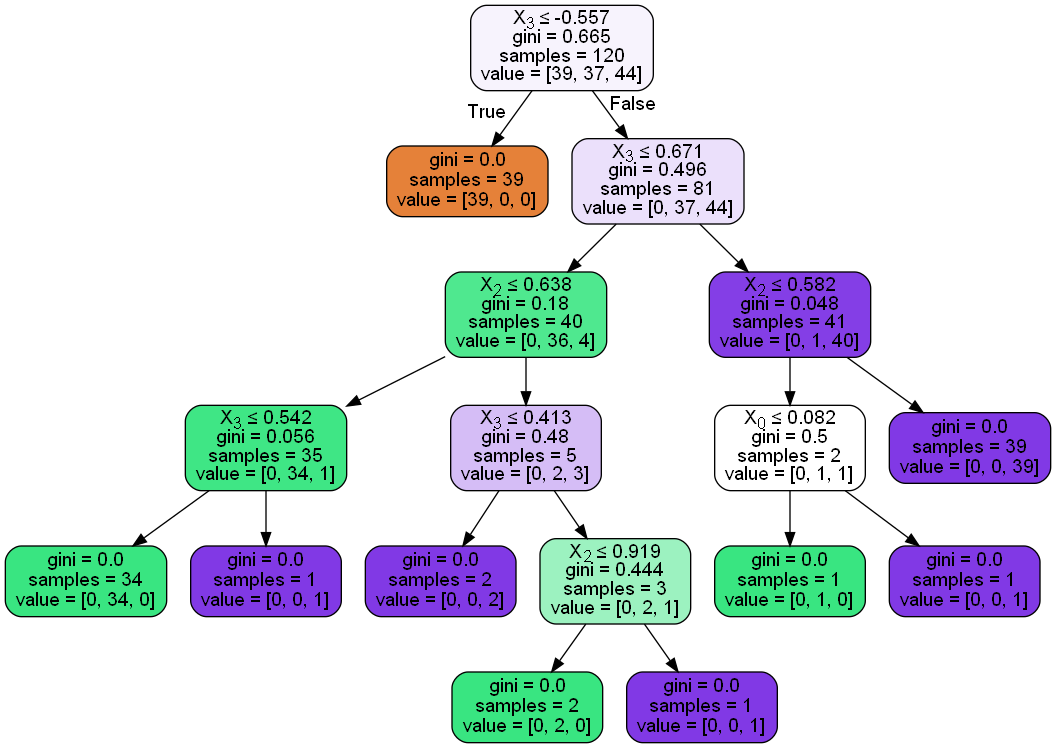

In [31]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data=StringIO()
export_graphviz(dtr,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Plotting the decision tree.Again it requires sklearn and these libraries.

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ydtr=le.fit_transform(ydtr)
y_test=le.fit_transform(y_test) # If we donot used Lable encoder we would get error, it is used for calculating the accuracy only not linked to the output.

In [35]:
from sklearn.metrics import r2_score
accuratedtr = r2_score(y_test,ydtr)
#for calculating the accuracy of the model we convert the ydtr and ytest into the 0,1 format.We used label encoder from the previous step.

In [ ]:
# R2 score tells how well the Regression or Classification fits the data.

In [92]:
accuratedtr

0.7525773195876289

In [ ]:
# Now Based upon the given data we have generated a model which can predict the type of data based upon the given four dimensions.

In [93]:
yd = dtr.predict([[5.3,3.6,1.4,0.2]]) #new data is passed here.
yd

array(['Iris-setosa'], dtype=object)

In [ ]:
#Thank You. 